## ML Income Qualification Project:

### DESCRIPTION: Identify the level of income qualification needed for the families in Latin America.

- Identify the output variable.
- Understand the type of data.
- Check if there are any biases in your dataset.
- Check whether all members of the house have the same poverty level.
- Check if there is a house without a family head.
- Set poverty level of the members and the head of the house within a family.
- Count how many null values are existing in columns.
- Remove null value rows of the target variable.
- Predict the accuracy using random forest classifier.
- Check the accuracy using random forest with cross validation.

In [1]:
import numpy as np

import pandas as pd 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


### Q1: Identify the output variable.

#### Answer:
The output variable is the 'Target' column which contains 4 levels: 1, 2, 3, and 4. 

In [5]:
train_data.select_dtypes('object').columns

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

In [6]:
for column in train_data.columns: 
    if column not in test_data.columns: 
        print('Output variable is: {}'. format(column))

Output variable is: Target


### Q2: Understand the type of data.

#### Answer:

There are a total of 143 columns in the dataset. The first 142 of these are input variables for the model which will be used to predict the output which is the last column of the dataset 'Target.' Target is the income level. 
- 8 columns are float64. 
- 130 columns are int64.
- 5 columns are object. 

#### Important columns to consider in the dataset: 
- Id- is the unique id for each row (person) in the dataset
- Target- the target is an ordinal variable indicating the level of income
    - 1= extremely poor 
    - 2= moderately poor 
    - 3= vulnerable
    - 4= non-vulnerable
- idhogar- is the unique identifier for each household. This is useful to come up with aggregate calculations and create household-wide features. 
- parentsco1- indicates if the person is the head of the household.


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [8]:
print('Integer Type: ', list(train_data.select_dtypes('int64').columns))
print('Float Type: ', list(train_data.select_dtypes('float64').columns))
print('Object Type: ', list(train_data.select_dtypes('object').columns))

Integer Type:  ['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1

### Q3: Check if there are any biases in your dataset.

#### Answer:
Bias in data occurs is an error that occurs when certain elements of a dataset or overrepresened or overweighted. 

Looking at the plot below, we can see that the data is a bit biased towards level 4 of the target variable, non-vulnerable subjects.

Biased datasets don't accuratel represent the ML model's use case and can result in skewed outcomes, low accuracy, and possible systematic prejudice.

<AxesSubplot:title={'center':'Target vs. Total Count'}>

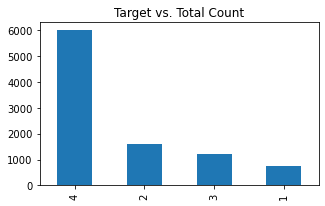

In [9]:
train_data['Target'].value_counts().plot.bar(figsize=(5,3), title='Target vs. Total Count')

### Q4: Check whether all members of the house have the same poverty level.

#### Answer:
There are a total of 2988 households in the dataset and 85 of them have at least one member with an income level different than other members of the household.

In [10]:
train_data['idhogar'].nunique()

2988

In [11]:
poverty_variance_within_household = train_data.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))


85


### Q5: Check if there is a house without a family head.

#### Answer:
Out of the total 2988 households, there are 15 households that do not have a family head.

In [12]:
idhogar_missing_head = []
grouped_head_info = train_data.groupby('idhogar')['parentesco1'].sum()

for i in range(len(grouped_head_info)):
    if grouped_head_info[i] == 0:
        idhogar_missing_head.append(grouped_head_info.index[i])

print(len(idhogar_missing_head))


15


### Q6: Set poverty level of the members and the family head as the same within a family.

In order to set poverty level of the members and the head of the house within a family, first we need to do it for households without a head (all members should have the same poverty level). Then, we'll set the family members' poverty level as the same as their head's poverty level for those households in which head/members have different poverty level. 

#### Answer: 
Set and verified below.


In [13]:
#As found in the previous section, 15 households out of 2988 do not have a family head.
for value in idhogar_missing_head: 
    k = train_data[train_data['idhogar']==value]['Target'].values
    if np.var(k) ==0: 
        print('Members in household {} have the same level of poverty'.format(value))

Members in household 03c6bdf85 have the same level of poverty
Members in household 09b195e7a have the same level of poverty
Members in household 1367ab31d have the same level of poverty
Members in household 1bc617b23 have the same level of poverty
Members in household 374ca5a19 have the same level of poverty
Members in household 61c10e099 have the same level of poverty
Members in household 6b1b2405f have the same level of poverty
Members in household 896fe6d3e have the same level of poverty
Members in household a0812ef17 have the same level of poverty
Members in household ad687ad89 have the same level of poverty
Members in household b1f4d89d7 have the same level of poverty
Members in household bfd5067c2 have the same level of poverty
Members in household c0c8a5013 have the same level of poverty
Members in household d363d9183 have the same level of poverty
Members in household f2bfa75c4 have the same level of poverty


#### Members in the 15 households without a family head have the same level of poverty. Now we have to check the households with a family head and set the members' poverty levels if they are different than the head.

In [14]:
#Set the poverty level as same for head/members

for value in list(poverty_variance_within_household[list(poverty_variance_within_household>1)].index): 
    #find the poverty level of family head for each household
    head_poverty = int(train_data[(train_data['idhogar']==value) & (train_data['parentesco1']==1)]['Target'].values)
    
    #assign the correct level to each member of the household 
    train_data.loc[train_data['idhogar'] == value, 'Target'] = head_poverty

In [15]:
poverty_variance_within_household = train_data.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))

#Now there are no households where members and the head have different income levels. 

0


### Q7: Count how many null values are existing in columns. 

#### Answer:

There are 5 columns with null values in the dataset as shown below. The total null values in the dataset are 22,140. 

In [16]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [17]:
train_data.isnull().sum()[train_data.isnull().sum()>0].count()

5

In [18]:
train_data.isnull().sum().sum()

22140

### Q8: Remove null value rows of the target variable.

#### Answer:
There are no null values in the Target column, therefore we do not need to remove any rows.

In [19]:
train_data['Target'].isnull().sum()

0

## Data Preprocessing + Feature Engineering before model building:

In [20]:
#Handling missing values 
null_percent = train_data.isnull().sum()/len(train_data)*100
null_percent[null_percent>0]

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

In [21]:
#Drop columns that have more than 30% missing values
data1 = train_data.drop(list(null_percent[null_percent>30].index), axis=1)



In [22]:
null_percent1 = data1.isnull().sum()
null_percent1[null_percent1>0]

meaneduc     5
SQBmeaned    5
dtype: int64

In [23]:
#We'll drop rows with missing values here since there are only 10
data1 = data1.dropna()
data1

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6c086aa3,1,4,0,5,.25,9,no,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,I

In [24]:
#No more missing values in dataset
data1.isnull().sum().sum()

0

In [25]:
data1.describe(include='all')

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.0,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552,9552,9552,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000,9552.000000
unique,9552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985,NaN,NaN,NaN,NaN,31,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_279628684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fd8a6d014,NaN,NaN,NaN,NaN,yes,no,no,NaN,NaN,NaN,Na

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.3+ MB


In [27]:
data1.select_dtypes('float64')

,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,10.00,1.000000,1.000000,0.0000,100.0000
1,12.00,1.000000,1.000000,64.0000,144.0000
2,11.00,0.500000,0.250000,64.0000,121.0000
3,11.00,1.333333,1.777778,1.0000,121.0000
4,11.00,1.333333,1.777778,1.0000,121.0000
...,...,...,...,...,...
9552,8.25,1.250000,1.562500,0.0625,68.0625
9553,8.25,1.250000,1.562500,0.0625,68.0625
9554,8.25,1.250000,1.562500,0.0625,68.0625
9555,8.25,1.250000,1.562500,0.0625,68.0625


In [28]:
data1.select_dtypes('int64')

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,9,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,0,0,1,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,81,2116,25,81,1,2116,2
9553,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,0,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,5,1,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,0,4,25,81,1,4,2
9554,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,5,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,5,0,1,0,0,0,0,0,0,0,4,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,25,2500,25,81,1,2500,2
9555,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5

In [29]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


### Feature Engineering 

We are going to summarize the information by household which means we'll have to group the individuals by house and aggregate the individual variables at the household level. 

#### Define Variable Categories in Dataset: 
1) Squared Variables: derived from squaring variables in the data 

2) ID Variables: identify the data and don't need to be used as features in model building 

3) Household Variables: 
 - Boolean: Yes or No (0 or 1) 
 - Ordered Discrete: Integers with an ordering 
 - Continuous numeric
    
4) Individual Variables: these are characteristics of each individual rather than the household
- Boolean: Yes or No (0 or 1)
- Ordered Discrete: Integers with an ordering

#### 1) Squared Variables 

- Need to check the correlation of the squared variables with their non-squared counterparts 
- Sometimes the squared variables are included in the dataset to help ML models learn non-linear relationships but since we will be using a complex model (random forest), these squared features are just extra, unnecessary features 
- We can drop highly correlated squared versions of the variables to prevent the slowdown of the model training

In [30]:
sqr_var = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 
           'SQBmeaned', 'agesq']

In [31]:
sq_age = (data1['SQBage'] == data1['agesq'])
sq_age

0       True
1       True
2       True
3       True
4       True
        ... 
9552    True
9553    True
9554    True
9555    True
9556    True
Length: 9552, dtype: bool

In [32]:
for i in sq_age: 
    if sq_age.values == 'False': 
        print('SQBage and agesq variables do not match')

In [33]:
sum(data1['SQBage'] == data1['agesq'])==len(data1)

True

'SQBage' and 'agesq' contains exactly the same data so we can drop any one of them.

In [34]:
sqr_var.remove('agesq')

In [35]:
sqr_var

['SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'SQBovercrowding',
 'SQBdependency',
 'SQBmeaned']

Now we need to check the correlation between squared and original variables.

In [36]:
nonsqr_var = ['escolari', 'age', 'hogar_total', 'edjefe', 'hogar_nin', 'overcrowding', 'dependency', 'meaneduc']

In [37]:
for i in range(len(sqr_var)): 
    print(data1[[sqr_var[i], nonsqr_var[i]]].corr(), '\n')

             SQBescolari  escolari
SQBescolari     1.000000  0.943317
escolari        0.943317  1.000000 

          SQBage       age
SQBage  1.000000  0.958078
age     0.958078  1.000000 

                SQBhogar_total  hogar_total
SQBhogar_total        1.000000     0.950192
hogar_total           0.950192     1.000000 

           SQBedjefe
SQBedjefe        1.0 

              SQBhogar_nin  hogar_nin
SQBhogar_nin      1.000000   0.884172
hogar_nin         0.884172   1.000000 

                 SQBovercrowding  overcrowding
SQBovercrowding         1.000000      0.945136
overcrowding            0.945136      1.000000 

               SQBdependency
SQBdependency            1.0 

           SQBmeaned  meaneduc
SQBmeaned   1.000000  0.948003
meaneduc    0.948003  1.000000 



These squared variables are highly correlated with their original variable counterparts, so we can drop them from the dataset.

In [38]:
data1.drop(sqr_var, axis=1, inplace=True)

In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 132 entries, Id to Target
dtypes: float64(2), int64(125), object(5)
memory usage: 9.7+ MB


#### 2) ID Variables:

- These variables will stay in the dataset for identification purpose.

In [40]:
id_var = ['Id', 'idhogar', 'Target']

#### 3) Household Variables: 

In [41]:
# 2 columns under household categories already dropped since these columns has more more than 30% null values.

hh_var_boo = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 'paredpreb','pisocemento', 'pareddes', 
              'paredmad','paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 
              'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 
              'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 
              'sanitario3', 'sanitario5',   'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 
              'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 
              'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2', 
              'tipovivi3', 'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 
              'lugar5', 'lugar6', 'area1', 'area2']

# 'v2a1' dropped from this list (>30% null values)
hh_var_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 'r4t3', 'tamhog',
                  'tamviv','hhsize','hogar_nin', 'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

#'v2a1' dropped from this list (>30% null values)
hh_var_cont = ['dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [42]:
head = data1.loc[data1['parentesco1'] == 1, :]
head = head[id_var + hh_var_boo + hh_var_cont + hh_var_ordered]
head.shape

(2970, 96)

#### Highly Correlated Household Variables

We're going to look at the correlations between all of the household variables. If there are any that are too highly correlated (above 95% correlation), then we will drop one pair of highly correlated variables.

In [43]:
#correlation matrix 
corr_matrix = head.corr()

#select upper triangle of correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#find index of feature columns with correlation greater than 0.95 
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

<AxesSubplot:>

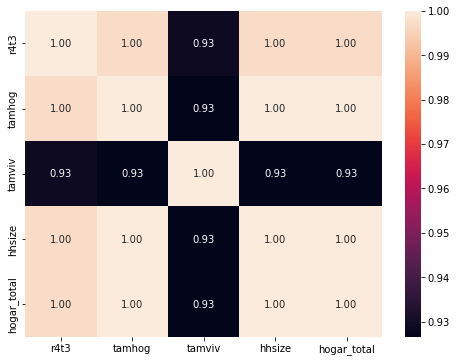

In [44]:
#Plot the correlation 
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, fmt='.2f')


In [45]:
# Lets drop one from each pair of variables which are all highly correlated with one another.
data1 = data1.drop(to_drop, axis= 1)

#### 4) Individual Level Variables:

- Two types of individual levek variables: boolean (1 or 0 for True or False) and ordinal (discrete values with a meaningful ordering).

In [46]:
# WE have already dropped column 'rez_esc' from dataset because it had more than 30% null values.

ind_var_boo = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 
               'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2',  'parentesco3', 
               'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9', 'parentesco10', 
               'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 
               'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'mobilephone']

# ind_var_ordered = ['rez_esc', 'escolari', 'age']
ind_var_ordered = ['escolari', 'age']

ind = data1[id_var + ind_var_boo + ind_var_ordered]
ind.shape

(9552, 38)

#### Highly Correlated Individual Variables

We're going to look at the correlations between all of the individual variables and perform the same process we did with the household level variables to get rid of redundant variables. If there are any that are too highly correlated (above 95% correlation), then we will drop one pair of highly correlated variables.

In [47]:
#Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [51]:
#since 'female' is just the oppsoite of 'male', we can drop one of them
data1 = data1.drop('male', axis = 1)

Now we need to check the 'object' type columns to see if any columns need to be dropped.

In [53]:
data1.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


Id and idhogar- not needed in model building (doesn't provide info needed for prediction) so we can drop them.

In [54]:
data1 = data1.drop(['Id', 'idhogar'], axis=1)
data1.shape

(9552, 124)

Now 3 columns are left with mixed (string and float/ integer) values:

- dependency - Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

- edjefe - years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

- edjefa - years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [57]:
# Custom function to convert object variables into numerical data.
# string to float
def num_map(i):
    
    if i=='yes':
        return(float(1))
    elif i=='no':
        return(float(0))
    else:
        return(float(i))

In [58]:
data1['dependency']=data1['dependency'].apply(num_map)
data1['edjefe']=data1['edjefe'].apply(num_map)
data1['edjefa']=data1['edjefa'].apply(num_map)

In [60]:
data1.info()
#no more variables with object data type 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 124 entries, hacdor to Target
dtypes: float64(5), int64(119)
memory usage: 9.1 MB


In [61]:
#X, y split 
X = data1.drop('Target', axis=1)
y = data1['Target']
print(X.shape)
print(y.shape)

(9552, 123)
(9552,)


In [62]:
X

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,agesq
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.00,10.0,0.0,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,43,1849
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.00,12.0,0.0,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,67,4489
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.00,0.0,11.0,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,92,8464
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,1.00,11.0,0.0,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,17,289
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1.00,11.0,0.0,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,37,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,0,0,0,1,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,46,2116
9553,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,1,0,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,2,4
9554,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,4,0,0.25,9.0,0.0,8.25,0,1,0,0,0,0,0,0,0,4,1.250000,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,50,2500
9555,0,6,0,1,1,0,0,2,2,1,2,3,1,4,5,5,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0

In [63]:
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9552, dtype: int64

### Model Building- Random Forest Classifier:

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7164, 123) (2388, 123) (7164,) (2388,)


In [70]:
RFC = RandomForestClassifier()

In [71]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
y_pred = RFC.predict(X_test) #testing accuracy on train data

In [76]:
RFC.score(X_train, y_train)

1.0

In [77]:
RFC.score(X_test, y_test) #testing accuracy on test data

0.9279731993299832

In [78]:
accuracy_score(y_test,y_pred)

0.9279731993299832

In [79]:
print(confusion_matrix(y_test,y_pred))

[[ 172    4    0   25]
 [   0  326    0   61]
 [   0    6  223   69]
 [   0    4    3 1495]]


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92       201
           2       0.96      0.84      0.90       387
           3       0.99      0.75      0.85       298
           4       0.91      1.00      0.95      1502

    accuracy                           0.93      2388
   macro avg       0.96      0.86      0.90      2388
weighted avg       0.93      0.93      0.93      2388



### Improving model performance using GridSearchCV:

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,25,50,100],
    'max_depth': [None,1,5,10],
    'min_samples_leaf': [1,3,5]
}

In [82]:
gs = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3, verbose=1)

In [83]:
gs.fit(X,y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 5, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 25, 50, 100]},
             verbose=1)

In [84]:
gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 10}

In [85]:
gs.best_score_

0.628036013400335

In [86]:
gs_predictions = gs.predict(X_test)

In [89]:
print('Accuracy Score:', accuracy_score(y_test,gs_predictions))

Accuracy Score: 0.6289782244556114


In [90]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
RFC.feature_importances_

array([2.66120295e-03, 2.49338022e-02, 1.49575942e-03, 9.64521920e-04,
       4.85712835e-03, 1.21315477e-02, 1.27357103e-02, 1.93800099e-02,
       1.95833746e-02, 1.52047968e-02, 1.60126574e-02, 1.93263002e-02,
       2.04244990e-02, 2.18509832e-02, 1.80684898e-02, 1.93524654e-02,
       2.17050889e-02, 1.44165873e-02, 5.85651283e-03, 9.26390330e-03,
       7.77795607e-04, 6.58865932e-03, 9.48278599e-04, 1.13273662e-04,
       1.84223362e-04, 1.26752257e-02, 8.27240657e-03, 3.64525196e-08,
       2.60700843e-05, 1.18649977e-03, 4.88521152e-03, 1.96566501e-03,
       1.56082699e-03, 4.56752957e-04, 4.40164335e-06, 1.64315288e-02,
       2.74421959e-03, 2.50495435e-03, 4.91008385e-04, 6.11364159e-03,
       8.48657235e-05, 1.13710289e-04, 3.42557574e-04, 6.38644249e-03,
       7.39437288e-03, 1.92397326e-03, 6.06083181e-04, 3.84911476e-04,
       9.63054001e-03, 9.59179222e-03, 5.37440673e-03, 6.21200563e-03,
       2.20151481e-03, 5.50348132e-03, 1.32144220e-04, 0.00000000e+00,
      

In [92]:
X_train.columns

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5',
       'lugar6', 'area1', 'age', 'agesq'],
      dtype='object', length=123)

In [93]:
labels = list(X_train)
feature_importances = pd.DataFrame({'feature': labels, 'importance': RFC.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
1,rooms,0.024934
7,r4h2,0.019380
8,r4h3,0.019583
9,r4m1,0.015205
10,r4m2,0.016013


In [94]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

,importance,positive
feature,,
r4m1,0.015205,True
eviv3,0.015729,True
r4m2,0.016013,True
cielorazo,0.016432,True
bedrooms,0.016859,True


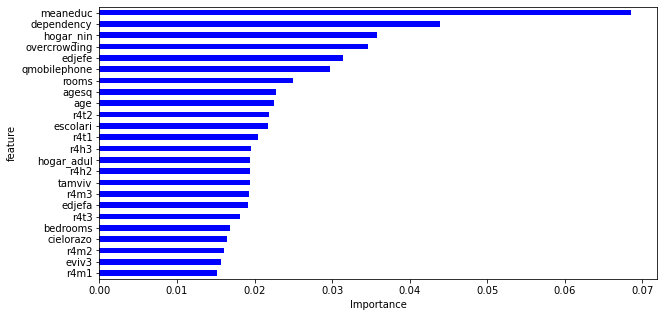

In [96]:
feature_importances.importance.plot(kind='barh', figsize=(10, 5),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

### The plot above shows that meanedu, dependency, and overcrowding are features that have significant influence on the model (determining the income level). 

- meaneduc = average years of education for adults (18+)
- dependency --> calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- overcrowding = # persons per room